# Rice Leaves Detection

In [4]:
import os
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


## Data Collecting

Data berisi gambar penyakit padi BrownSpot dan daun padi yang sehat. Data sudah terbagi ke dalam 3 bagian yaitu train, validation, dan test.

In [5]:
train_dir = os.path.join('dataset', 'ready_dataset', 'train')
val_dir = os.path.join('dataset', 'ready_dataset', 'val')
test_dir = os.path.join('dataset', 'ready_dataset', 'test')

In [9]:
# jumlah file masing masing bagian dan kelas

for part in os.listdir(os.path.join('dataset', 'ready_dataset')):
    list_jumlah_file_baru = {}
    print(part)
    for kelas in os.listdir(os.path.join('dataset', 'ready_dataset', part)):
        list_jumlah_file_baru[kelas] = len(os.listdir(os.path.join('dataset', 'ready_dataset', part, kelas)))

    print(list_jumlah_file_baru)

val
{'BrownSpot': 94, 'Healthy': 268}
test
{'BrownSpot': 52, 'Healthy': 148}
train
{'BrownSpot': 377, 'Healthy': 377}


In [11]:
# jumlah total file
files_cnt = 0

for path, dirs, files in os.walk(os.path.join('dataset', 'ready_dataset')):
    files_cnt += len(files)

print(f'Total file = {files_cnt}')

Total file = 1316


## Exploratory Data Analysis

Menampilkan sampel gambar dari setiap kelas


Sampel gambar kelas BrownSpot


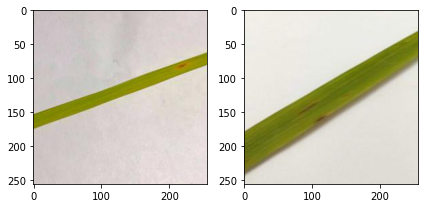


Sampel gambar kelas Healthy


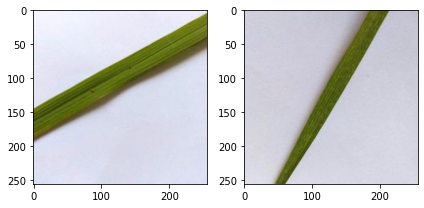

In [14]:
random_number = random.randint(0, 377)
for kelas in os.listdir(train_dir):
    path_kelas = os.path.join(train_dir, kelas) # /dataset/ricelll/train/brownspot
    print(f"\nSampel gambar kelas {kelas}")
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(
        load_img(os.path.join(path_kelas,
                              os.listdir(path_kelas)[random_number])) # /dataset/ricelll/train/brownspot/imhg_ksjs.jpg
    )
    axs[1].imshow(
        load_img(os.path.join(path_kelas,
                              os.listdir(path_kelas)[random_number+2]))
    )
    fig.tight_layout()
    plt.show()

## Data Preprocessing

Preprocessing menggunakan augmentasi gambar. Proses-proses augmentasi gambar meliputi:

- Normalisasi data, CNN lebih cepat memproses data dengan rentang 0-1 daripada 0-255. Caranya tinggal bagi semua dengan 255.
- Rotasi, 20 derajat
- Flip horizontal
- Flip vertical
- Shear
- Geser tinggi (height shift)
- Geser lebar (width shift)

In [23]:
train_datagen = ImageDataGenerator(
                    rescale=1./255, # normalisasi gambar
                    rotation_range=20, # memutar gambar
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range=0.2,
                    # zoom_range=0.5,
                    height_shift_range=0.2,
                    width_shift_range=0.2,
                    fill_mode='nearest')

# untuk data test dan val hanya di normalisasi saja
val_datagen = test_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data train
    target_size=(244,244), # mengubah resolusi seluruh gambar jadi 244*244
    batch_size=32, # jumlah sampel pelatihan yang digunakan dalam satu iterasi
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(244,244),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(244,244),
    batch_size=32,
    class_mode='binary'
)

Found 362 images belonging to 2 classes.


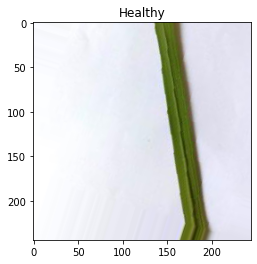

In [18]:
# gambar setelah preprocessing
image, label  = train_generator.next()
plt.title(os.listdir(train_dir)[int(label[0])])
plt.imshow(image[0])

## Modelling

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), strides=1, padding='same', activation='relu', input_shape=(244,244,3)),
    tf.keras.layers.MaxPool2D((2,2), strides=2, padding='same'),
    tf.keras.layers.Conv2D(32, (3,3), strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2), strides=2, padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), strides=1, padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    tf.keras.layers.Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    tf.keras.layers.Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    tf.keras.layers.Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 128 , activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 64 , activation = 'relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 244, 244, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 122, 122, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 122, 122, 32)      4640      
                                                                 
 batch_normalization_15 (Bat  (None, 122, 122, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 61, 61, 32)       0         
 g2D)                                                            
                                                      

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    patience = 2,
    verbose=1,
    factor=0.3,
    min_lr=0.000001
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
24/24 [==============================] - 32s 467ms/step - loss: 0.6497 - accuracy: 0.7825 - val_loss: 0.8472 - val_accuracy: 0.2597 - lr: 0.0010
Epoch 2/100
24/24 [==============================] - 11s 440ms/step - loss: 0.4377 - accuracy: 0.8316 - val_loss: 1.3366 - val_accuracy: 0.2597 - lr: 0.0010
Epoch 3/100
24/24 [==============================] - ETA: 0s - loss: 0.3992 - accuracy: 0.8475
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
24/24 [==============================] - 10s 435ms/step - loss: 0.3992 - accuracy: 0.8475 - val_loss: 1.1593 - val_accuracy: 0.2597 - lr: 0.0010
Epoch 4/100
24/24 [==============================] - 11s 439ms/step - loss: 0.3857 - accuracy: 0.8422 - val_loss: 0.5018 - val_accuracy: 0.7569 - lr: 3.0000e-04
Epoch 5/100
24/24 [==============================] - 11s 438ms/step - loss: 0.3487 - accuracy: 0.8621 - val_loss: 0.4977 - val_accuracy: 0.7403 - lr: 3.0000e-04
Epoch 6/100
24/24 [=============================

In [ ]:
# simpan model supaya tidak fit berkali kali
model.save('mymodel')

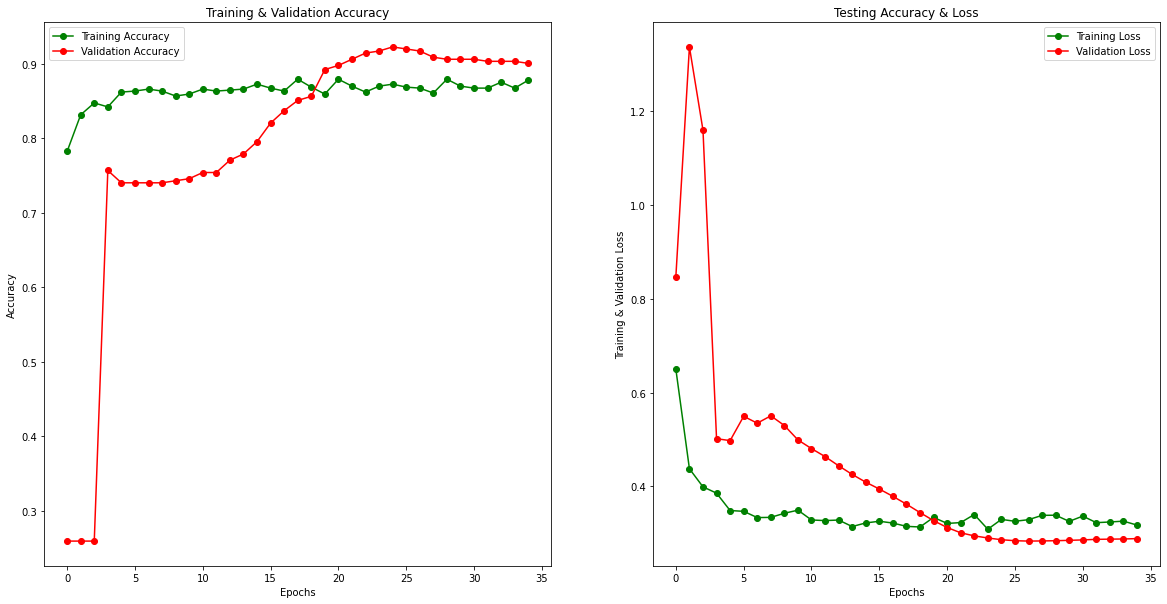

In [ ]:
epochs = [i for i in range(35)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()